# LSTM+RNN

In [51]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader.data as web
from pmdarima import auto_arima

In [52]:
#get the data
df=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2020-5-02')
dataset_hol=pd.DataFrame(data=df)
dataset_hol
dataset_hol=dataset_hol.reset_index()
dataset_train = dataset_hol[dataset_hol['Date']<'2020-01-01'].copy()
dataset_train
dataset_test = dataset_hol[dataset_hol['Date']>'2020-01-01'].copy()
dataset_test
dataset_test['Date'] = pd.to_datetime(dataset_test.Date,format='%Y-%m-%d')
dataset_train['Date'] = pd.to_datetime(dataset_train.Date,format='%Y-%m-%d')
dataset_train.to_csv ('C:\\Users\\RITIN JAISWAL\\Desktop\\MLDM\\Train.csv', index = False, header=True)
dataset_test.to_csv ('C:\\Users\\RITIN JAISWAL\\Desktop\\MLDM\\Test.csv', index = False, header=True)


In [53]:

dataset_test.index = dataset_test['Date']
dataset_train.index = dataset_train['Date']
dataset_train=dataset_train.drop(['Date'], axis=1)
dataset_test=dataset_test.drop(['Date'], axis=1)

In [54]:
dataset_train

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,283.596924
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,289.223602
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,289.113831


In [55]:
dataset_test

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,300.600006,295.190002,296.239990,300.350006,33870100.0,299.638885
2020-01-03,300.579987,296.500000,297.149994,297.429993,36580700.0,296.725769
2020-01-06,299.959991,292.750000,293.790009,299.799988,29596800.0,299.090149
2020-01-07,300.899994,297.480011,299.839996,298.390015,27218000.0,297.683533
2020-01-08,304.440002,297.160004,297.160004,303.190002,33019800.0,302.472137
...,...,...,...,...,...,...
2020-04-27,284.540009,279.950012,281.799988,283.170013,29271900.0,283.170013
2020-04-28,285.829987,278.200012,285.079987,278.579987,28001200.0,278.579987
2020-04-29,289.670013,283.890015,284.730011,287.730011,34320200.0,287.730011


Epoch 1/100
1952/1952 [==============================] - 7s 3ms/step - loss: 0.0157
Epoch 2/100
1952/1952 [==============================] - 5s 3ms/step - loss: 0.0029
Epoch 3/100
1952/1952 [==============================] - 6s 3ms/step - loss: 0.0028
Epoch 4/100
1952/1952 [==============================] - 7s 4ms/step - loss: 0.0023
Epoch 5/100
1952/1952 [==============================] - 7s 3ms/step - loss: 0.0022
Epoch 6/100
1952/1952 [==============================] - 7s 3ms/step - loss: 0.0020
Epoch 7/100
1952/1952 [==============================] - 7s 3ms/step - loss: 0.0021
Epoch 8/100
1952/1952 [==============================] - 7s 3ms/step - loss: 0.0019
Epoch 9/100
1952/1952 [==============================] - 7s 3ms/step - loss: 0.0017
Epoch 10/100
1952/1952 [==============================] - 7s 3ms/step - loss: 0.0020
Epoch 11/100
1952/1952 [==============================] - 7s 3ms/step - loss: 0.0017
Epoch 12/100
1952/1952 [==============================] - 7s 3ms/step - lo

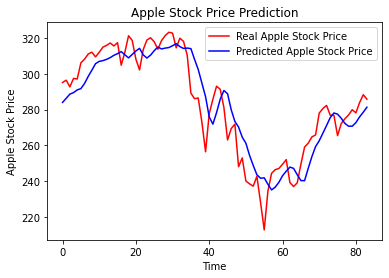

In [56]:

# Importing the training set

training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



# Part 3 - Making the predictions and visualising the results

# Getting the real stock price OF test data

real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price 
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

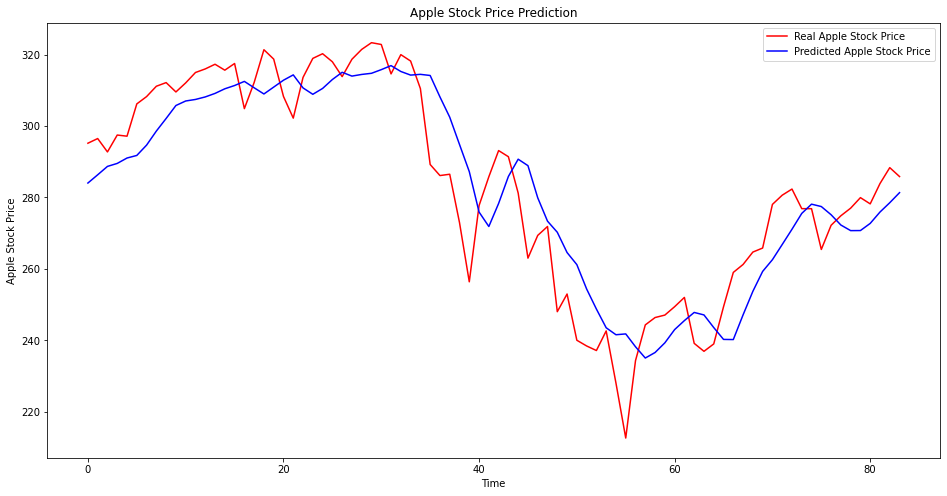

In [57]:
plt.figure(figsize=(16,8))
plt.plot(real_stock_price, color = 'red', label = 'Real Apple Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [58]:
from math import sqrt
mse = mean_squared_error(real_stock_price, predicted_stock_price)
rmse = sqrt(mse)

In [59]:
rmse

11.562829489998862

In [60]:
mse

133.69902581478735

# Lstm

In [61]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [62]:
#get the data
df=web.DataReader('AAPL',data_source='yahoo',start='2012-01-01',end='2020-5-02')
dataset_hol=pd.DataFrame(data=df)
dataset_hol
dataset_hol=dataset_hol.reset_index()


In [63]:
dataset_hol

,Date,High,Low,Open,Close,Volume,Adj Close
0,2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
1,2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2,2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
3,2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
4,2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...,...
2091,2020-04-27,284.540009,279.950012,281.799988,283.170013,29271900.0,283.170013
2092,2020-04-28,285.829987,278.200012,285.079987,278.579987,28001200.0,278.579987
2093,2020-04-29,289.670013,283.890015,284.730011,287.730011,34320200.0,287.730011
2094,2020-04-30,294.529999,288.350006,289.959991,293.799988,45766000.0,293.799988


In [64]:
#creating dataframe
data = dataset_hol.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = new_data[:2013]
valid = new_data[2013:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Epoch 1/1
 - 58s - loss: 0.0014


<ipython-input-65-9ac5c44f6cf6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


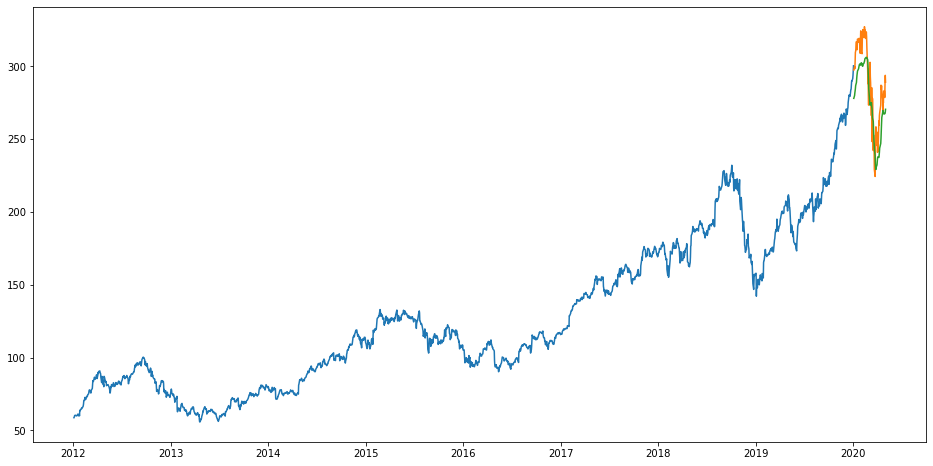

In [65]:
#for plotting
plt.figure(figsize=(16,8))
train = new_data[:2013]
valid = new_data[2013:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

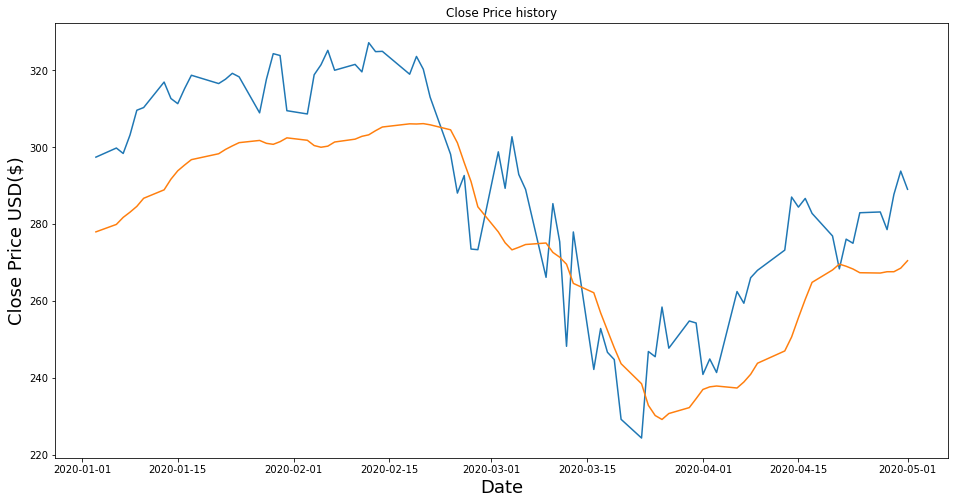

In [66]:
plt.figure(figsize=(16,8))
plt.title("Close Price history")
#plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.show()

In [71]:
from math import sqrt
mse = mean_squared_error(valid['Close'],valid['Predictions'])
rmse = sqrt(mse)

In [72]:
rmse

18.268453125221587

In [73]:
mse

333.73637958841834

# Basic Arima

In [74]:
model = auto_arima(train, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=83)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=8771.901, BIC=8799.906, Time=11.217 seconds
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=True); AIC=10053.180, BIC=10064.381, Time=0.111 seconds
Fit ARIMA: (1, 1, 0)x(1, 1, 0, 12) (constant=True); AIC=9529.873, BIC=9552.276, Time=1.795 seconds
Fit ARIMA: (0, 1, 1)x(0, 1, 1, 12) (constant=True); AIC=8771.757, BIC=8794.161, Time=4.192 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 1, 0)x(0, 1, 0, 12) (constant=False); AIC=10051.212, BIC=10056.813, Time=0.078 seconds
Fit ARIMA: (1, 1, 1)x(0, 1, 0, 12) (constant=True); AIC=10054.273, BIC=10076.677, Time=1.315 seconds
Fit ARIMA: (1, 1, 1)x(1, 1, 1, 12) (constant=True); AIC=8774.088, BIC=8807.693, Time=13.838 seconds
Near non-invertible roots for order (1, 1, 1)(1, 1, 1, 12); setting score to inf (at least one i

In [83]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

40.569405175072475

In [80]:
rmse

40.569405175072475

# Random Forest

In [87]:
sc=MinMaxScaler(feature_range= (0,1))
training_set_scaled=sc.fit_transform(dataset_train)
dataset_train
X_train=[]
y_train=[]
for i in range(60,training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-60:i])
    y_train.append(training_set_scaled[i,0])
        
X_train,y_train=np.array(X_train), np.array(y_train) 

nsamples, nx, ny = X_train.shape
X_train = X_train.reshape((nsamples,nx*ny))
inputs = sc.transform(df)
inputs.shape
X_test = []
y_test = []

for i in range (60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

nsamples, nx, ny = X_test.shape
X_test = X_test.reshape((nsamples,nx*ny))

In [88]:
from sklearn.ensemble import RandomForestRegressor
#Random Forest
models_perfs = [] #list of dictionaries of models' performances

# basic RandonForest 
clf = RandomForestRegressor() # default params.
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [89]:
clf_predict = clf.predict(X_test)
sc.scale_
scale=1/4.35062293e-03
scale
clf_predict = clf_predict*scale
y_test=y_test*scale

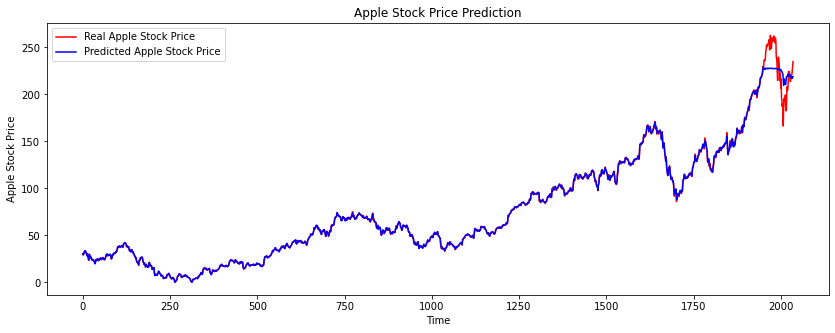

In [90]:
#visualising the results
plt.figure(figsize= (14,5))
plt.plot(y_test, color ='red', label = 'Real Apple Stock Price')
plt.plot(clf_predict, color ='blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()

In [91]:
from sklearn.metrics import mean_squared_error, r2_score

In [92]:
print(r2_score(y_test, clf_predict))#best value=1

0.9938993857456283


In [93]:
from math import sqrt
mse = mean_squared_error(y_test, clf_predict)
rmse = sqrt(mse)

In [94]:
rmse

4.521783123567915

In [95]:
mse

20.44652261658361

In [97]:
def measureParams(model, paramsDict):
    
    """
    Inputs: 
        Model - SKlearn model object
        paramsDict - Dictionary of input parameters
        
    Output:
        Nested Dictionary of results
    """
    
    results = []
    metric_list = ["MSE","MAE","R2","Time"]
    Ys_init = {}
    for i in metric_list:
        Ys_init[i] = []
    
    for k in tqdm(paramsDict.keys()):
        Xs = []
        Ys = copy.deepcopy(Ys_init)
        for v in paramsDict[k]:
            Xs.append(v)
            reg = model()
            params = {k:v}
            reg.set_params(**params)
            start_time = time.time() # Start timer
            reg.fit(X_train, y_train)
            delta = time.time() - start_time # Training time
            preds = reg.predict(X_test)
            mse,mae,r2 = modelEvaluation(y_test,preds)
            Ys['MSE'].append(mse)
            Ys['MAE'].append(mae)
            Ys['R2'].append(r2)
            Ys['Time'].append(delta)
        result = {
            "title":f"{k}_plot",
            "Xs":Xs,
            "Ys":Ys
        }
        results.append(result)
    return results
    

In [100]:
mlp = RandomForestRegressor() # default params.
mlp.fit(X_train, y_train)

results = measureParams(
    RandomForestRegressor, # sklean model object without initialising i.e: without ()
    
    # a dictionary with keys being parameters of the model. NOTE: only numeric parameters can be plotted
    # and values being the range of that parameter to evaluate as a list. NOTE: In ascending order
    {
               
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf' : [1, 2, 4],
               'bootstrap': [True, False]
     }
    # 12 iterations (len max_fun + len alpha + len max_iter)
)

<IPython.core.display.Javascript object>

TypeError: 'module' object is not callable

In [ ]:

fig, axs = plt.subplots(len(results))
for i in range(len(results)):
    axs[i].plot(results[i]["Xs"], results[i]["Ys"]['MAE'])
    axs[i].set_title(results[i]["title"])

plt.ylabel("MAE")
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
fig.tight_layout(pad=2.5)


In [ ]:
X_test,y_test

In [102]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics as metrics
import numpy as np#
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import MinMaxScaler
import math
SEED = 111 
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)

In [104]:
from sklearn.model_selection import KFold 

In [ ]:
def training():
    clf1 = RandomForestRegressor()
    distributions = dict(n_estimators=[int(x) for x in np.linspace(start = 10, stop = 5000, num = 10)],
               max_features= ['auto', 'sqrt'],
               max_depth=[int(x) for x in np.linspace(10, 1100, num = 11)],
               min_samples_split= [10,20,30,400],
               min_samples_leaf = [0.01,0.1,1,1000],
               bootstrap= [True, False])
    clf = RandomizedSearchCV(clf1, distributions, random_state=42,n_iter = 5, cv = 5,n_jobs = -1)
    search = clf.fit(X_train, y_train)
    cd=search.best_params_
    print(cd)
    Model_updated = RandomForestRegressor (n_estimators=search.best_params_['n_estimators'],
                          max_features= search.best_params_['max_features'], 
                          max_depth= search.best_params_['max_depth'],
                          min_samples_split = search.best_params_['min_samples_split'],
                          min_samples_leaf=search.best_params_['min_samples_leaf'],
                          bootstrap=search.best_params_['bootstrap'])
    Model_updated.fit(X_train, y_train)
    predictions = Model_updated.predict(X_test)
    mse = mean_squared_error(y_test, clf_predict)
    rmse = sqrt(mse)
    print(rmse)
    #print('acc for test data: {:.3f}'.format(Model_updated.score(X_test, y_test)*100))
    scores = []
    cv = KFold(n_splits=5, random_state=42, shuffle=False)
    #for train_index, test_index in cv.split(trn_x):
     #   print("Train Index: ", train, "\n")
      #  print("Test Index: ", validation)

    #X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    Model_updated.fit(X_train, y_train)
    scores.append(Model_updated.score(X_test, y_test))
    predictions = Model_updated.predict(X_test)
    print('acc for training data: {:.3f}'.format(np.mean(scores)*100))
    print('acc for test data: {:.3f}'.format(Model_updated.score(X_test, y_test)*100))
    r2 = r2_score(y_test,predictions)
    print(r2)
    #print('Mean Absolute Error:', metrics.mean_absolute_error(val_y,predictions))
    #print('Mean Squared Error:', metrics.mean_squared_error(val_y,predictions))
    #print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(val_y,predictions)))
training()  
    

In [ ]:
clf = RandomForestRegressor(n_estimators= 3336, min_samples_split= 30, min_samples_leaf= 1, max_features='auto', max_depth= 555, bootstrap=False) 
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
sc.scale_
scale=1/4.35062293e-03
scale
clf_predict = clf_predict*scale
y_test=y_test*scale
#visualising the results
plt.figure(figsize= (14,5))
plt.plot(y_test, color ='red', label = 'Real Apple Stock Price')
plt.plot(clf_predict, color ='blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()
mse = mean_squared_error(y_test, clf_predict)
rmse = sqrt(mse)
print(rmse)